In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import time
# %matplotlib inline

In [2]:
months=13
batch_size=360
epoch_size=10
DIR_ROOT = "/Users/stardust/StardustJavaProjects/JavaTest";

In [3]:
data_bed = []
for i in range(1,months+1):
    data_ = pd.read_csv(DIR_ROOT + "/{}bed_level.txt.csv".format(i),header=None)
    data_.columns = ['x','y','bed_level']
    data_bed.append(data_)

In [4]:
len(data_bed)

13

In [5]:
data_bed[12]

,x,y,bed_level
0,518693.195313,3.368709e+06,20.538614
1,518732.648438,3.368797e+06,21.723602
2,518775.289063,3.368875e+06,20.020536
3,518825.367188,3.368948e+06,22.505301
4,518882.789063,3.369016e+06,24.735243
...,...,...,...
35995,527137.609375,3.382640e+06,24.382263
35996,527168.234375,3.382688e+06,24.036366
35997,527196.937500,3.382736e+06,24.412762
35998,527224.312500,3.382784e+06,24.797714


In [6]:
data_ = []
data_.append(data_bed[4].iloc[30100:30103])
data_.append(data_bed[4].iloc[30103:30106])
data_

[                   x             y  bed_level
 30100  522042.382813  3.373878e+06   1.290496
 30101  522061.484375  3.373906e+06   1.910207
 30102  522081.414063  3.373936e+06   2.595494,
                    x             y  bed_level
 30103  522102.250000  3.373968e+06   3.270399
 30104  522124.039063  3.374001e+06   3.694517
 30105  522146.820313  3.374036e+06   3.781859]

In [7]:
data_bed.count

<function list.count(value, /)>

In [8]:
data_sedmiment = []
for i in range(1,months):
    data_ = pd.read_csv(DIR_ROOT + "/{}sediment_concentration.xyz.csv".format(i),header=None)
    data_.columns = ['x','y','sand_z','concentration']
    data_sedmiment.append(data_)
data_sedmiment[4].iloc[30100:30200,:]

,x,y,sand_z,concentration
30100,522042.382813,3.373878e+06,6.676435,0.009027
30101,522061.484375,3.373906e+06,6.985826,0.011448
30102,522081.414063,3.373936e+06,7.327604,0.015275
30103,522102.250000,3.373968e+06,7.663913,0.021059
30104,522124.039063,3.374001e+06,7.874988,0.025316
...,...,...,...,...
30195,526429.359375,3.380550e+06,8.695766,0.001340
30196,526444.468750,3.380588e+06,8.839143,0.001267
30197,526459.171875,3.380626e+06,9.053247,0.001326
30198,526473.546875,3.380663e+06,9.320088,0.001703


In [9]:
data_sedmiment[4].count

<bound method DataFrame.count of                    x             y     sand_z  concentration
0      518693.195313  3.368709e+06  20.538614            0.0
1      518732.648438  3.368797e+06  21.723602            0.0
2      518775.289063  3.368875e+06  20.020536            0.0
3      518825.367188  3.368948e+06  22.505301            0.0
4      518882.789063  3.369016e+06  24.735243            0.0
...              ...           ...        ...            ...
35995  527137.609375  3.382640e+06  24.382263            0.0
35996  527168.234375  3.382688e+06  24.036366            0.0
35997  527196.937500  3.382736e+06  24.412762            0.0
35998  527224.312500  3.382784e+06  24.797714            0.0
35999  527250.968750  3.382832e+06  24.585445            0.0

[36000 rows x 4 columns]>

In [10]:
data_velocity = []
for i in range(1,months):
    data_ = pd.read_csv(DIR_ROOT + "/{}velocity.xyz.csv".format(i),header=None)
    data_.columns = ['x','y','x_velocity','y_velocity','xy_velocity']
    data_velocity.append(data_)
data_velocity[4].iloc[30100:30200,:]

,x,y,x_velocity,y_velocity,xy_velocity
30100,522042.382813,3.373878e+06,0.397100,0.496184,0.635521
30101,522061.484375,3.373906e+06,0.404101,0.503862,0.645890
30102,522081.414063,3.373936e+06,0.414820,0.513693,0.660269
30103,522102.250000,3.373968e+06,0.426268,0.519740,0.672186
30104,522124.039063,3.374001e+06,0.430343,0.520641,0.675471
...,...,...,...,...,...
30195,526429.359375,3.380550e+06,0.310145,0.348087,0.466213
30196,526444.468750,3.380588e+06,0.292949,0.353607,0.459192
30197,526459.171875,3.380626e+06,0.276159,0.366597,0.458974
30198,526473.546875,3.380663e+06,0.267360,0.382961,0.467055


In [11]:
data_water_depth = []
for i in range(1,months):
    data_ = pd.read_csv(DIR_ROOT + "/{}water_depth.xyz.csv".format(i),header=None)
    data_.columns = ['x','y','water_depth']
    data_water_depth.append(data_)
data_water_depth[4].iloc[30100:30200,:]

,x,y,water_depth
30100,522042.382813,3.373878e+06,10.771878
30101,522061.484375,3.373906e+06,10.151239
30102,522081.414063,3.373936e+06,9.464220
30103,522102.250000,3.373968e+06,8.787028
30104,522124.039063,3.374001e+06,8.360943
...,...,...,...
30195,526429.359375,3.380550e+06,6.401565
30196,526444.468750,3.380588e+06,6.114544
30197,526459.171875,3.380626e+06,5.685476
30198,526473.546875,3.380663e+06,5.149618


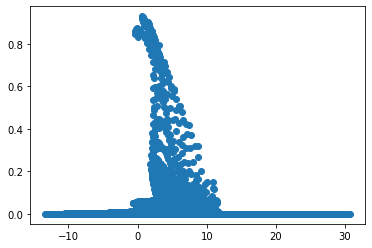

In [12]:
plt.scatter(data_bed[4].iloc[:,2],data_sedmiment[4].iloc[:,3])

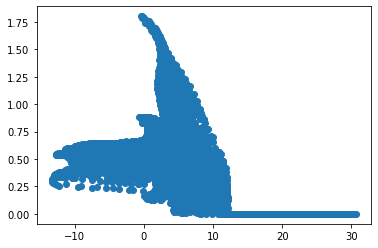

In [13]:
plt.scatter(data_bed[4].iloc[:,2],data_velocity[4].iloc[:,4])

In [14]:
data_sedmiment[4].iloc[0:3,3]

0    0.0
1    0.0
2    0.0
Name: concentration, dtype: float64

In [15]:
data_bed[4].iloc[0:3,2]

0    20.538614
1    21.723602
2    20.020536
Name: bed_level, dtype: float64

In [16]:
from itertools import chain
data_all = pd.DataFrame()
for i in range(0,months-1):
    print(i)
    data_ = pd.concat([data_bed[i],data_sedmiment[i].iloc[:,2:4],data_velocity[i].iloc[:,2:5],data_water_depth[i].iloc[:,2],data_bed[i+1].iloc[:,2]],axis=1)
    data_all = pd.concat([data_all,data_],axis=0)
data_all.head()
data_all.columns = ['x','y','bed_level','sand_z','concentration','x_velocity','y_velocity','xy_velocity','water_depth','bed_level_next']

0
1
2
3
4
5
6
7
8
9
10
11


In [17]:
len(data_all)

432000

In [18]:
def function(a, b):
    if a == b:
        return 1
    else:
        return 0

In [19]:
data_all['bool'] = data_all.apply(lambda x : function(x['bed_level'],x['bed_level_next']),axis = 1)

In [20]:
data_all

,x,y,bed_level,sand_z,concentration,x_velocity,y_velocity,xy_velocity,water_depth,bed_level_next,bool
0,518693.195313,3.368709e+06,20.538614,20.538614,0.0,0.0,0.0,0.0,0.0,20.538614,1
1,518732.648438,3.368797e+06,21.723602,21.723602,0.0,0.0,0.0,0.0,0.0,21.723602,1
2,518775.289063,3.368875e+06,20.020536,20.020536,0.0,0.0,0.0,0.0,0.0,20.020536,1
3,518825.367188,3.368948e+06,22.505301,22.505301,0.0,0.0,0.0,0.0,0.0,22.505301,1
4,518882.789063,3.369016e+06,24.735243,24.735243,0.0,0.0,0.0,0.0,0.0,24.735243,1
...,...,...,...,...,...,...,...,...,...,...,...
35995,527137.609375,3.382640e+06,24.382263,24.382263,0.0,0.0,0.0,0.0,0.0,24.382263,1
35996,527168.234375,3.382688e+06,24.036366,24.036366,0.0,0.0,0.0,0.0,0.0,24.036366,1
35997,527196.937500,3.382736e+06,24.412762,24.412762,0.0,0.0,0.0,0.0,0.0,24.412762,1
35998,527224.312500,3.382784e+06,24.797714,24.797714,0.0,0.0,0.0,0.0,0.0,24.797714,1


In [21]:
data_all[data_all['bool']==0]

,x,y,bed_level,sand_z,concentration,x_velocity,y_velocity,xy_velocity,water_depth,bed_level_next,bool
306,527177.843750,3.379902e+06,6.609991,9.248161,0.0,0.042446,0.175876,0.180926,5.276340,6.609992,0
307,527193.109375,3.379951e+06,10.554782,11.219424,0.0,0.019602,0.094836,0.096840,1.329284,10.554783,0
663,527150.000000,3.379748e+06,2.475131,7.178958,0.0,0.011049,0.110650,0.111200,9.407653,2.475132,0
668,527203.703125,3.380001e+06,10.085732,10.984797,0.0,0.020097,0.087154,0.089441,1.798128,10.085733,0
686,527461.250000,3.380797e+06,11.544970,11.710191,0.0,0.034610,0.088507,0.095033,0.330443,11.544979,0
...,...,...,...,...,...,...,...,...,...,...,...
34573,518650.804688,3.370666e+06,9.840307,10.882904,0.0,0.045465,0.022850,0.050884,2.085194,9.840311,0
34912,527083.468750,3.382460e+06,11.493412,11.683721,0.0,0.036438,0.061387,0.071387,0.380618,11.493429,0
34914,527148.109375,3.382563e+06,11.286215,11.579431,0.0,0.035399,0.070440,0.078834,0.586432,11.286410,0
34915,527179.828125,3.382613e+06,11.134176,11.504102,0.0,0.046097,0.060769,0.076275,0.739852,11.134890,0


In [22]:
data_all.iloc[30100:30200,:]

,x,y,bed_level,sand_z,concentration,x_velocity,y_velocity,xy_velocity,water_depth,bed_level_next,bool
30100,522042.382813,3.373878e+06,1.224725,6.579474,0.0,0.208365,0.259817,0.333048,10.709499,1.225367,0
30101,522061.484375,3.373906e+06,1.856257,6.895099,0.0,0.213452,0.266583,0.341509,10.077683,1.856831,0
30102,522081.414063,3.373936e+06,2.552324,7.242833,0.0,0.220645,0.274553,0.352227,9.381017,2.552832,0
30103,522102.250000,3.373968e+06,3.255025,7.593645,0.0,0.227784,0.279672,0.360696,8.677240,3.255469,0
30104,522124.039063,3.374001e+06,3.691299,7.811277,0.0,0.229297,0.280103,0.361987,8.239955,3.691689,0
...,...,...,...,...,...,...,...,...,...,...,...
30195,526429.359375,3.380550e+06,5.461373,8.670155,0.0,0.155071,0.178778,0.236662,6.417565,5.462041,0
30196,526444.468750,3.380588e+06,5.753713,8.816368,0.0,0.146843,0.183909,0.235341,6.125311,5.754241,0
30197,526459.171875,3.380626e+06,6.186863,9.032986,0.0,0.138520,0.192778,0.237384,5.692245,6.187279,0
30198,526473.546875,3.380663e+06,6.725537,9.302244,0.0,0.134655,0.204749,0.245059,5.153414,6.725863,0


In [23]:
model = tf.keras.Sequential()
model.add(layers.Dense(32, input_shape=(9,), activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.summary()
model.add(layers.Dense(1))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
Total params: 984
Trainable params: 984
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer='adam',
              loss='mse'
)

In [25]:
split=396000

In [26]:
train_x = data_all.iloc[:split,0: -2]
train_y = data_all.iloc[:split,-2]

In [27]:
train_x

,x,y,bed_level,sand_z,concentration,x_velocity,y_velocity,xy_velocity,water_depth
0,518693.195313,3.368709e+06,20.538614,20.538614,0.0,0.0,0.0,0.0,0.0
1,518732.648438,3.368797e+06,21.723602,21.723602,0.0,0.0,0.0,0.0,0.0
2,518775.289063,3.368875e+06,20.020536,20.020536,0.0,0.0,0.0,0.0,0.0
3,518825.367188,3.368948e+06,22.505301,22.505301,0.0,0.0,0.0,0.0,0.0
4,518882.789063,3.369016e+06,24.735243,24.735243,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
35995,527137.609375,3.382640e+06,24.382263,24.382263,0.0,0.0,0.0,0.0,0.0
35996,527168.234375,3.382688e+06,24.036366,24.036366,0.0,0.0,0.0,0.0,0.0
35997,527196.937500,3.382736e+06,24.412762,24.412762,0.0,0.0,0.0,0.0,0.0
35998,527224.312500,3.382784e+06,24.797714,24.797714,0.0,0.0,0.0,0.0,0.0


In [28]:
train_y

0        20.538614
1        21.723602
2        20.020536
3        22.505301
4        24.735243
           ...    
35995    24.382263
35996    24.036366
35997    24.412762
35998    24.797714
35999    24.585445
Name: bed_level_next, Length: 396000, dtype: float64

In [29]:
mean = train_x.mean(axis=0)
std = train_x.std(axis=0)
train_max = train_x.max(axis=0)
train_min = train_x.min(axis=0)
mean.shape

(9,)

In [30]:
test_x = data_all.iloc[split:, 0: -2]
test_y = data_all.iloc[split:,-2]

In [31]:
train_x = (train_x - mean)/(train_max - train_min)
test_x = (test_x - mean)/(train_max - train_min)
train_x.head()

,x,y,bed_level,sand_z,concentration,x_velocity,y_velocity,xy_velocity,water_depth
0,-0.398073,-0.395379,0.259698,0.283232,-0.018231,-0.122633,-0.126259,-0.175055,-0.200826
1,-0.394349,-0.389156,0.286612,0.320949,-0.018231,-0.122633,-0.126259,-0.175055,-0.200826
2,-0.390323,-0.383620,0.247931,0.266743,-0.018231,-0.122633,-0.126259,-0.175055,-0.200826
3,-0.385595,-0.378455,0.304366,0.345830,-0.018231,-0.122633,-0.126259,-0.175055,-0.200826
4,-0.380174,-0.373667,0.355014,0.416806,-0.018231,-0.122633,-0.126259,-0.175055,-0.200826


In [32]:
time_begin = time.time()
history = model.fit(train_x, train_y, batch_size = batch_size, epochs=epoch_size, verbose=1)
time_end = time.time()
print("fit cost time: %.2f s"%(time_end - time_begin))

Epoch 1/10
1100/1100 [==============================] - 1s 539us/step - loss: 16.0490
Epoch 2/10
1100/1100 [==============================] - 1s 516us/step - loss: 0.0433
Epoch 3/10
1100/1100 [==============================] - 1s 508us/step - loss: 0.0268
Epoch 4/10
1100/1100 [==============================] - 1s 523us/step - loss: 0.0235
Epoch 5/10
1100/1100 [==============================] - 1s 518us/step - loss: 0.0220
Epoch 6/10
1100/1100 [==============================] - 1s 517us/step - loss: 0.0209
Epoch 7/10
1100/1100 [==============================] - 1s 530us/step - loss: 0.0204
Epoch 8/10
1100/1100 [==============================] - 1s 545us/step - loss: 0.0198
Epoch 9/10
1100/1100 [==============================] - 1s 505us/step - loss: 0.0193
Epoch 10/10
1100/1100 [==============================] - 1s 545us/step - loss: 0.0188
fit cost time: 6.17 s


In [33]:
history.history.get('loss')[-5:]

[0.02093120850622654,
 0.020361144095659256,
 0.019842999055981636,
 0.019297847524285316,
 0.01882077194750309]

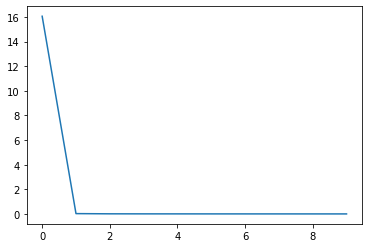

In [34]:
plt.plot(history.epoch, history.history.get('loss'))

In [35]:
test_x

,x,y,bed_level,sand_z,concentration,x_velocity,y_velocity,xy_velocity,water_depth
0,-0.398073,-0.395379,0.259698,0.283232,-0.018231,-0.122633,-0.126259,-0.175055,-0.200826
1,-0.394349,-0.389156,0.286612,0.320949,-0.018231,-0.122633,-0.126259,-0.175055,-0.200826
2,-0.390323,-0.383620,0.247931,0.266743,-0.018231,-0.122633,-0.126259,-0.175055,-0.200826
3,-0.385595,-0.378455,0.304366,0.345830,-0.018231,-0.122633,-0.126259,-0.175055,-0.200826
4,-0.380174,-0.373667,0.355014,0.416806,-0.018231,-0.122633,-0.126259,-0.175055,-0.200826
...,...,...,...,...,...,...,...,...,...
35995,0.399155,0.591026,0.346997,0.405571,-0.018231,-0.122633,-0.126259,-0.175055,-0.200826
35996,0.402047,0.594447,0.339141,0.394561,-0.018231,-0.122633,-0.126259,-0.175055,-0.200826
35997,0.404756,0.597841,0.347690,0.406541,-0.018231,-0.122633,-0.126259,-0.175055,-0.200826
35998,0.407341,0.601231,0.356433,0.418794,-0.018231,-0.122633,-0.126259,-0.175055,-0.200826


In [36]:
result = model.predict(test_x, batch_size=36000)
result = pd.DataFrame(result)
result_y = pd.DataFrame(test_y)
result = pd.concat([result,result_y],axis=1)
result

,0,bed_level_next
0,20.652578,20.538614
1,21.828770,21.723602
2,20.118822,20.020536
3,22.594034,22.505301
4,24.814272,24.735243
...,...,...
35995,24.395029,24.382263
35996,24.038683,24.036366
35997,24.417675,24.412762
35998,24.805456,24.797714


In [37]:
test_y

0        20.538614
1        21.723602
2        20.020536
3        22.505301
4        24.735243
           ...    
35995    24.382263
35996    24.036366
35997    24.412762
35998    24.797714
35999    24.585445
Name: bed_level_next, Length: 36000, dtype: float64

In [38]:
evaluate_result = model.evaluate(test_x,test_y)
print(evaluate_result)

1125/1125 [==============================] - 0s 348us/step - loss: 0.0050
0.004963018000125885


In [39]:
result_save = pd.DataFrame(result)
result_save.to_csv("~/SandWaterBpNetTest.csv")
print(result_save[8630:8670])

              0  bed_level_next
8630  -3.191328       -3.184303
8631  -3.527838       -3.526288
8632  -4.118377       -4.117174
8633  -4.756781       -4.754453
8634  -5.315515       -5.308677
8635  -5.912066       -5.832083
8636  -6.512111       -6.282992
8637  -6.769832       -6.463263
8638  -6.167920       -5.585868
8639  -1.625475       -0.575524
8640   7.772945        8.833398
8641   8.693624        9.258107
8642   8.455168        8.956196
8643   7.265619        7.747399
8644   6.210994        6.524829
8645   5.549086        5.738035
8646   5.238631        5.336702
8647   5.226190        5.275166
8648   5.358904        5.385376
8649   5.601383        5.615054
8650   5.961244        5.964448
8651   6.385646        6.373296
8652   6.809623        6.789522
8653   7.183307        7.196412
8654   7.578526        7.590178
8655   7.958901        7.959760
8656   8.289636        8.283836
8657   8.546162        8.535892
8658   8.919378        8.904062
8659   9.261853        9.242686
8660   9